In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

right_image size: (354, 400, 3)
left_image size: (354, 400, 3)


<Figure size 432x288 with 0 Axes>

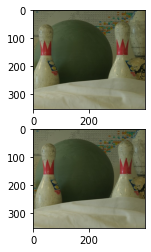

In [ ]:
PATH1 = "l.jpeg"
PATH2 = "r.jpeg"

left_bgr = cv2.imread(PATH1)
left_image = cv2.cvtColor(left_bgr, cv2.COLOR_BGR2RGB)
right_bgr = cv2.imread(PATH2)
right_image = cv2.cvtColor(right_bgr, cv2.COLOR_BGR2RGB)

# scale_percent = 100
# width = int(left_image.shape[1] * scale_percent / 100)
# height = int(left_image.shape[0] * scale_percent / 100)
# left_image = cv2.resize(left_image, (width, height))
# width = int(right_image.shape[1] * scale_percent / 100)
# height = int(right_image.shape[0] * scale_percent / 100)
# right_image = cv2.resize(right_image, (width, height))

plt.figure()
f, axarr = plt.subplots(2,1)
axarr[0].imshow(right_image)
axarr[1].imshow(left_image)

print("right_image size:",right_image.shape)
print("left_image size:",left_image.shape)

In [ ]:
#Create depth map
def compute_disparity_map(left_image, right_image, window_size, search_range, match_function):
  h_left, w_left,_ = left_image.shape #find image dimensions
  disparity_map = np.zeros((h_left, w_left))
  offset = int(window_size/2) #offset used to avoid points on edges so kernel window overlaps image completely
  for r_left in range (offset, (h_left-offset)):
    for c_left in range (offset, (w_left-offset)):
      left_point = [r_left, c_left] #find the best match for this left_point in the right_image
      right_point = find_best_match(left_image, right_image, left_point, window_size,search_range, offset, match_function)
      disparity_map[r_left][c_left] = compute_disparity(left_point, right_point)
  return disparity_map

#find pixel's best match on the horizontal epipolar (The right_point with minimum ssd)
def find_best_match(left_image, right_image, left_point, window_size, search_range, offset, match_function):
  min_ssd = 99999
  #Search for the best match in a given pixel range - faster and better output
  begin, end = calculate_search_range(left_point, right_image, search_range, offset)
  best_match = left_point #initialization
  for c_right in range (begin, end):
    right_point = [left_point[0], c_right]
    if(match_function == 'sad'):
      value_ssd = sad(left_image, right_image, left_point, right_point, window_size, offset)
    else:
      value_ssd = ssd(left_image, right_image, left_point, right_point, window_size, offset)
    if(value_ssd < min_ssd):
      min_ssd = value_ssd
      best_match = right_point
  return best_match

#Calculate search range in pixels along the epipolar line
def calculate_search_range(left_point, right_image, search_range, offset):
  end = left_point[1]+search_range
  begin = left_point[1] -search_range
  if(end >= right_image.shape[1]-offset):
    end = right_image.shape[1]-offset
  if(begin <= offset):
    begin = offset
  return begin,end

#compute Sum of Squared Differnce with nxn window for a point
def ssd(left_image, right_image, left_point, right_point, n, offset):  
  #Create window for around each point
  left_window = left_image[left_point[0]-offset:left_point[0]+offset+1, left_point[1]-offset:left_point[1]+offset+1, :]
  right_window = right_image[right_point[0]-offset:right_point[0]+offset+1, right_point[1]-offset:right_point[1]+offset+1, :]
  #calculate SSD
  return np.sum((left_window[:,:,0:3]-right_window[:,:,0:3])**2)

#compute Sum of Absolute Differnce with nxn window for a point
def sad(left_image, right_image, left_point, right_point, n, offset):  
  #Create window for around each point
  left_window = left_image[left_point[0]-offset:left_point[0]+offset+1, left_point[1]-offset:left_point[1]+offset+1, :]
  right_window = right_image[right_point[0]-offset:right_point[0]+offset+1, right_point[1]-offset:right_point[1]+offset+1, :]
  #calculate SSD
  return np.sum(abs(left_window[:,:,0:3]-right_window[:,:,0:3]))

#compute disparity between matching points
def compute_disparity(left_point, right_point):
  return abs(left_point[1]-right_point[1])

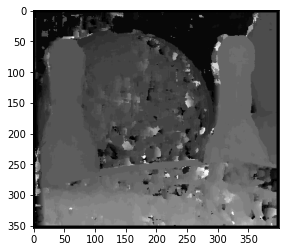

In [ ]:
disparity_map = compute_disparity_map(left_image, right_image, 9, 30, 'ssd')
plt.imshow(disparity_map, cmap= 'gray')

ERROR! Session/line number was not unique in database. History logging moved to new session 59


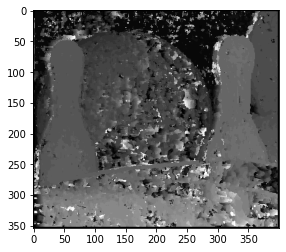

In [ ]:
disparity_map = compute_disparity_map(left_image, right_image, 5, 30, 'ssd')
plt.imshow(disparity_map, cmap= 'gray')

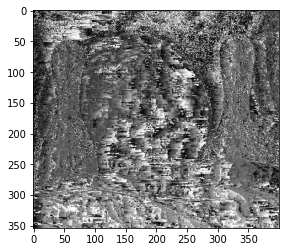

In [ ]:
disparity_map = compute_disparity_map(left_image, right_image, 1, 30, 'ssd')
plt.imshow(disparity_map, cmap= 'gray')

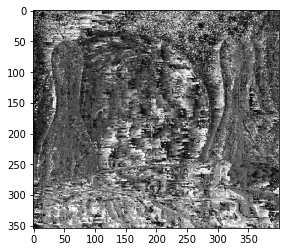

In [ ]:
disparity_map = compute_disparity_map(left_image, right_image, 1, 30, 'sad')
plt.imshow(disparity_map, cmap= 'gray')